In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carga de datos

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=11bDsmghhB4vJYZUQq7sI_9iYX33d2r0v")
df.head()

,ingreso_mensual,deuda_actual,antiguedad_laboral,valor_propiedades,edad,num_tarjetas,num_creditos_previos,monto_solicitado,riesgo_crediticio,estado_civil,fecha_solicitud,puntaje_crediticio,id_solicitud
0,5361.049816,5209.417131,1.979698,73409.264470,43.234735,1,4,8443.508601,Bajo,Soltero,2024-09-23 07:27:55.628952,715.924567,SOL-418903
1,22540.170738,3820.246914,6.485436,48612.833482,36.716474,0,0,3973.123440,Alto,Viudo,2024-09-27 07:27:55.628952,743.757014,SOL-468117
2,18633.618715,1294.662874,14.823828,73754.109616,33.336359,2,0,9379.250202,Bajo,Casado,2025-03-21 07:27:55.628952,489.244014,SOL-930738
3,51415.489569,3147.336358,NaN,33000.773984,21.024820,0,3,14749.255842,Moderado,Casado,2024-02-07 07:27:55.628952,573.727522,SOL-994801
4,7841.207960,4431.335740,NaN,192075.477609,52.952992,5,1,18793.922591,Bajo,NaN,2023-12-02 07:27:55.628952,573.085765,SOL-810731


# Análisis Exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ingreso_mensual       1442 non-null   float64       
 1   deuda_actual          1500 non-null   float64       
 2   antiguedad_laboral    1385 non-null   float64       
 3   valor_propiedades     1417 non-null   float64       
 4   edad                  1500 non-null   float64       
 5   num_tarjetas          1500 non-null   int64         
 6   num_creditos_previos  1500 non-null   int64         
 7   monto_solicitado      1500 non-null   float64       
 8   riesgo_crediticio     1500 non-null   object        
 9   estado_civil          1427 non-null   object        
 10  fecha_solicitud       1500 non-null   datetime64[ns]
 11  puntaje_crediticio    1384 non-null   float64       
 12  id_solicitud          1500 non-null   object        
dtypes: datetime64[ns](

In [ ]:
display(pd.DataFrame({
    'Tipo': df.dtypes,
    'Valores Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
}))

,Tipo,Valores Nulos,% Nulos
ingreso_mensual,float64,58,3.87
deuda_actual,float64,0,0.00
antiguedad_laboral,float64,115,7.67
valor_propiedades,float64,83,5.53
edad,float64,0,0.00
num_tarjetas,int64,0,0.00
num_creditos_previos,int64,0,0.00
monto_solicitado,float64,0,0.00
riesgo_crediticio,object,0,0.00
estado_civil,object,73,4.87


In [ ]:
# Convertir la fecha de solicitud a datemtime
df['fecha_solicitud'] = pd.to_datetime(df['fecha_solicitud'])

## Análisis de variables categóricas

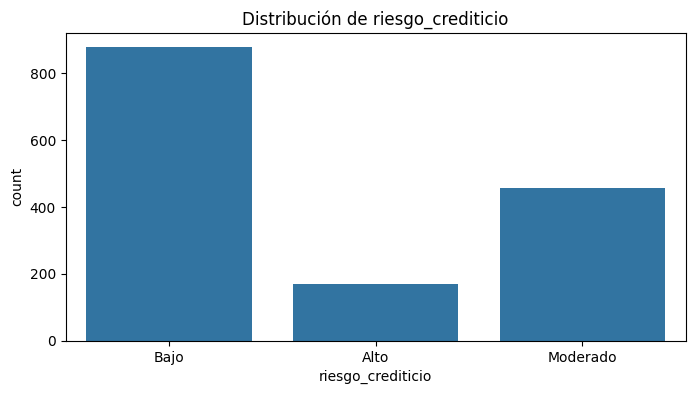

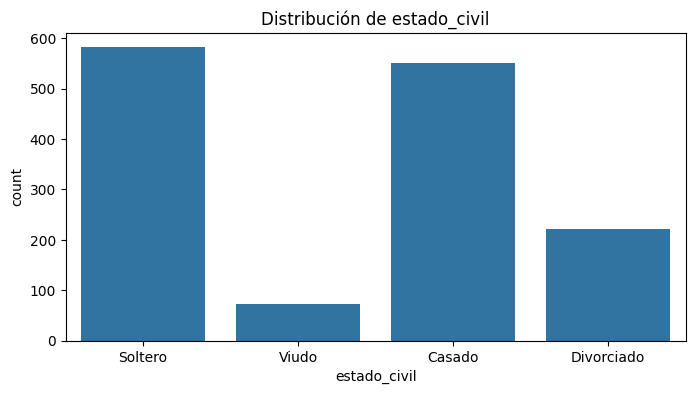

In [ ]:
cat_cols = ['riesgo_crediticio', 'estado_civil']

for col in cat_cols:
    # Gráfico de distribución
    plt.figure(figsize=(8, 4))
    if df[col].nunique() > 5:
        # Para variables con muchos valores únicos, mostrar solo los top
        top_values = df[col].value_counts().head(10)
        sns.barplot(x=top_values.index, y=top_values.values)
        plt.title(f'Top 10 valores más frecuentes en {col}')
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col)
        plt.title(f'Distribución de {col}')
    plt.show()

## Análisis de variables numéricas

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Estadísticas descriptivas
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ingreso_mensual,1442.0,24070.845689,33088.678272,1054.935488,8255.103296,14419.735204,25716.219289,431434.063252
deuda_actual,1500.0,2860.730681,1626.930102,421.649907,1798.840437,2454.648353,3355.559376,11475.747995
antiguedad_laboral,1385.0,7.191563,5.910829,0.000000,1.947721,6.765846,11.222309,35.942754
valor_propiedades,1417.0,64114.401009,25492.868651,12469.487003,45527.651977,59859.570546,77245.818462,192075.477609
edad,1500.0,35.077918,12.397668,18.000000,24.120612,35.320798,44.404195,80.000000
num_tarjetas,1500.0,2.547333,1.910199,0.000000,1.000000,3.000000,4.000000,10.000000
num_creditos_previos,1500.0,1.620667,1.524792,0.000000,0.000000,1.000000,3.000000,7.000000
monto_solicitado,1500.0,10362.674693,8148.774824,698.358349,4939.737218,7969.742136,13190.647715,53907.675089
puntaje_crediticio,1384.0,648.832807,98.497780,348.048784,582.397016,649.844378,716.917640,850.000000


In [ ]:
# Función para identificar outliers usando el método IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers


Variable: ingreso_mensual
Valores nulos: 58 (3.87%)
Número de outliers (IQR method): 124 (8.27%)


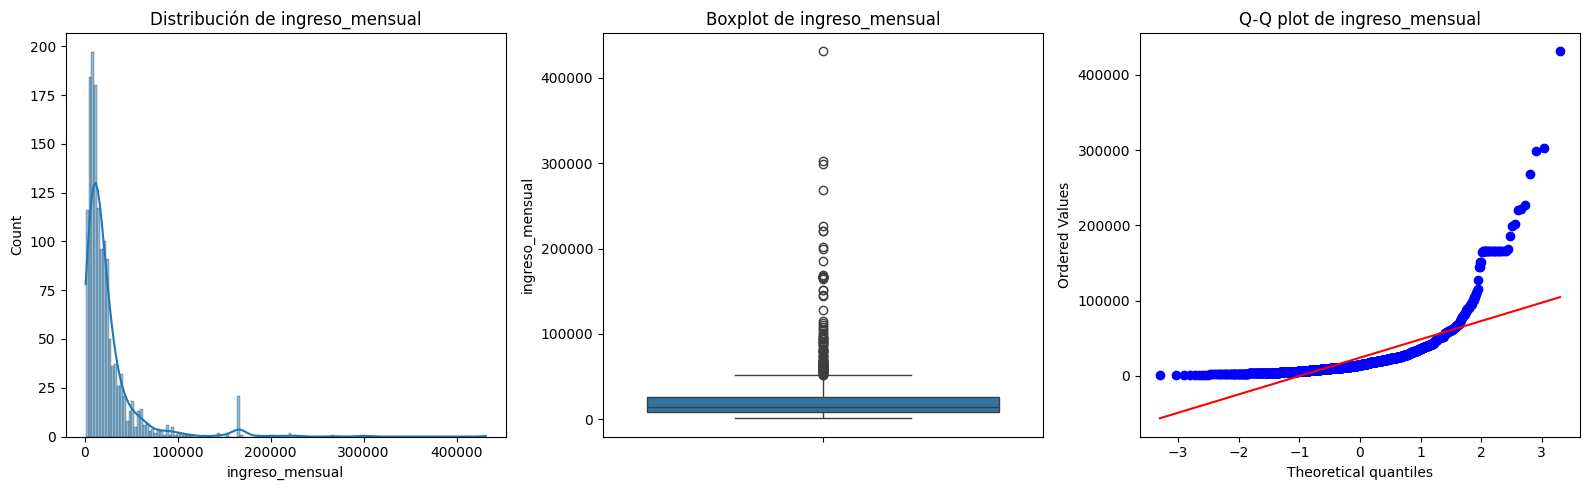


Variable: deuda_actual
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 91 (6.07%)


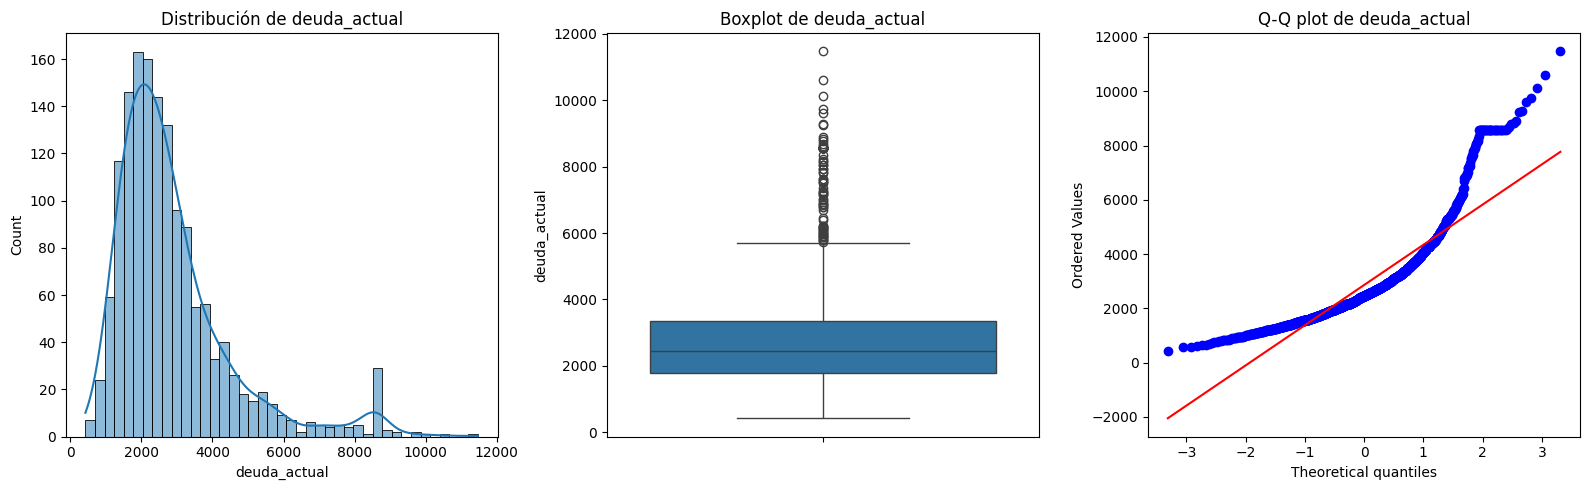


Variable: antiguedad_laboral
Valores nulos: 115 (7.67%)
Número de outliers (IQR method): 6 (0.40%)


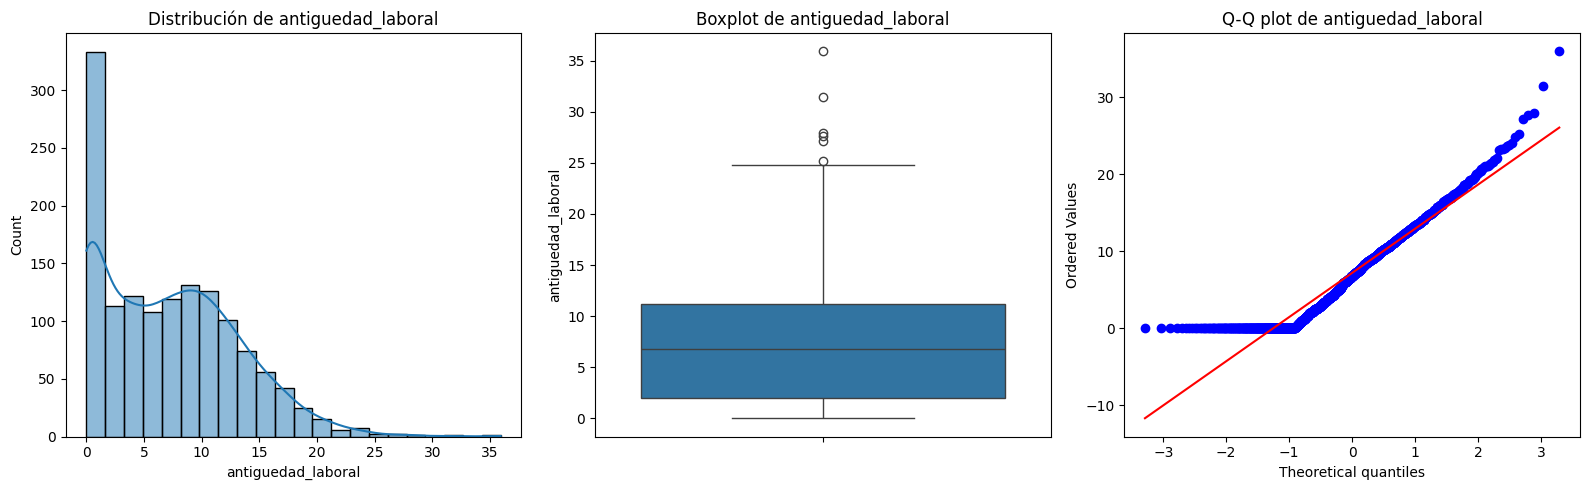


Variable: valor_propiedades
Valores nulos: 83 (5.53%)
Número de outliers (IQR method): 40 (2.67%)


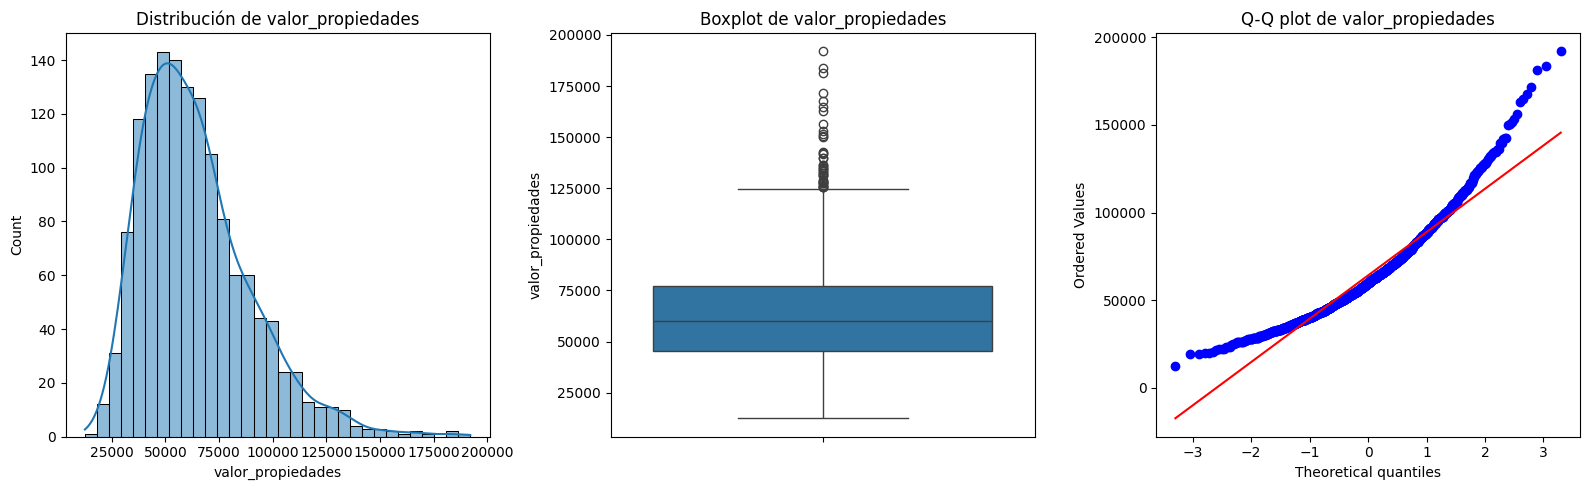


Variable: edad
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 3 (0.20%)


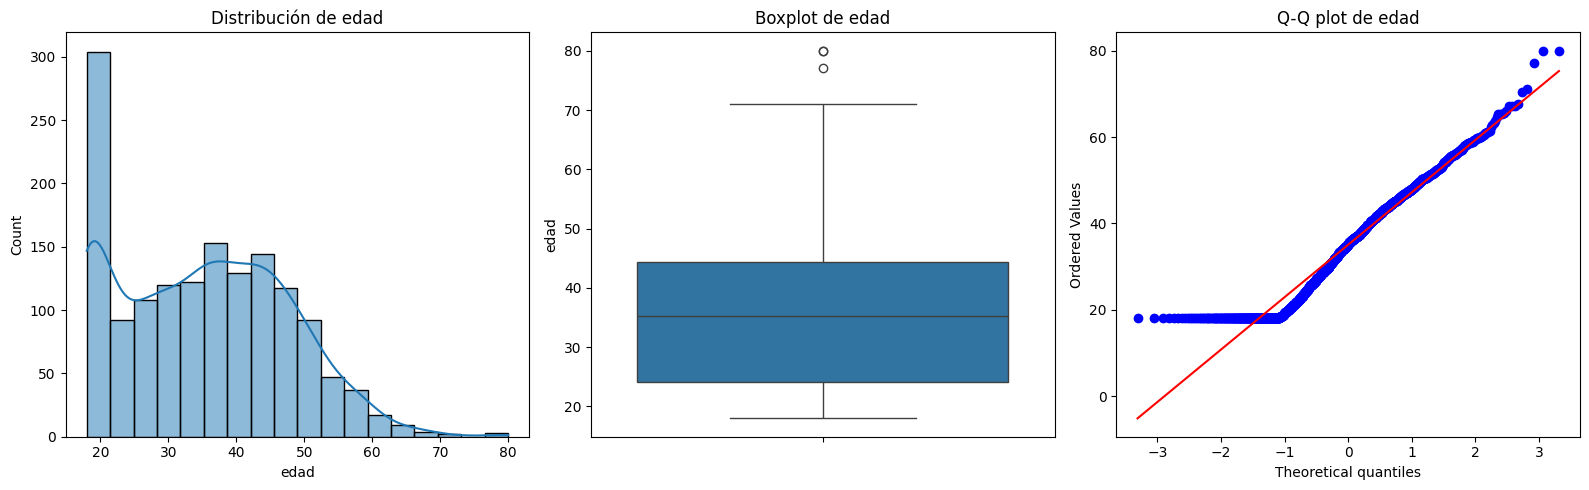


Variable: num_tarjetas
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 2 (0.13%)


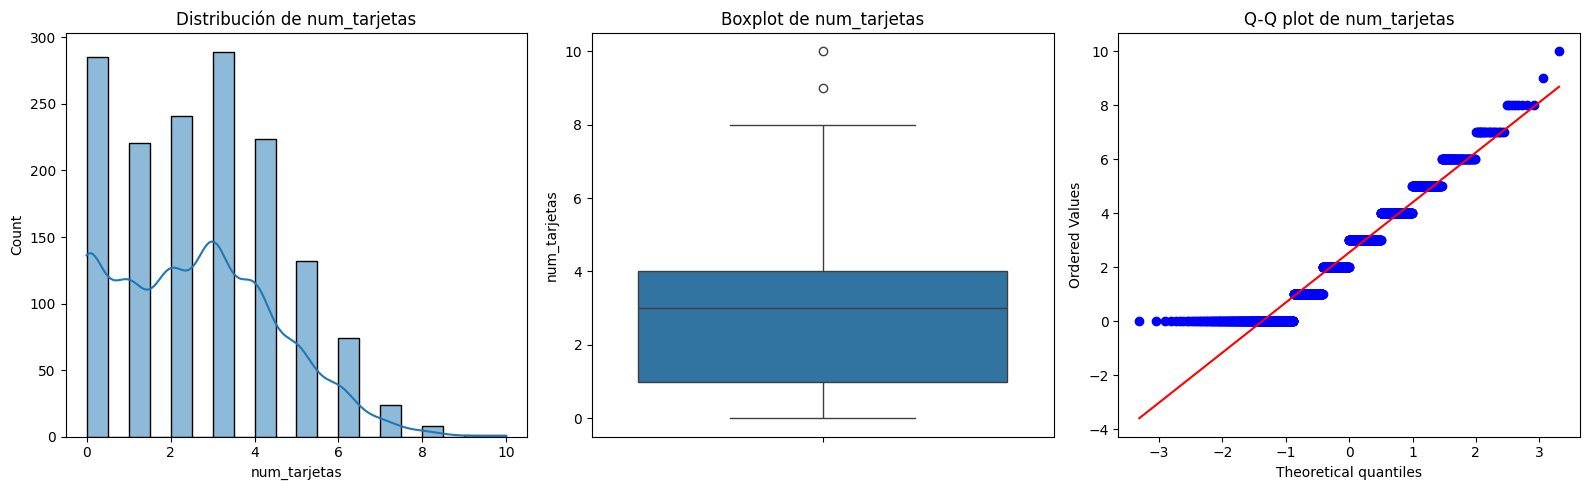


Variable: num_creditos_previos
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 0 (0.00%)


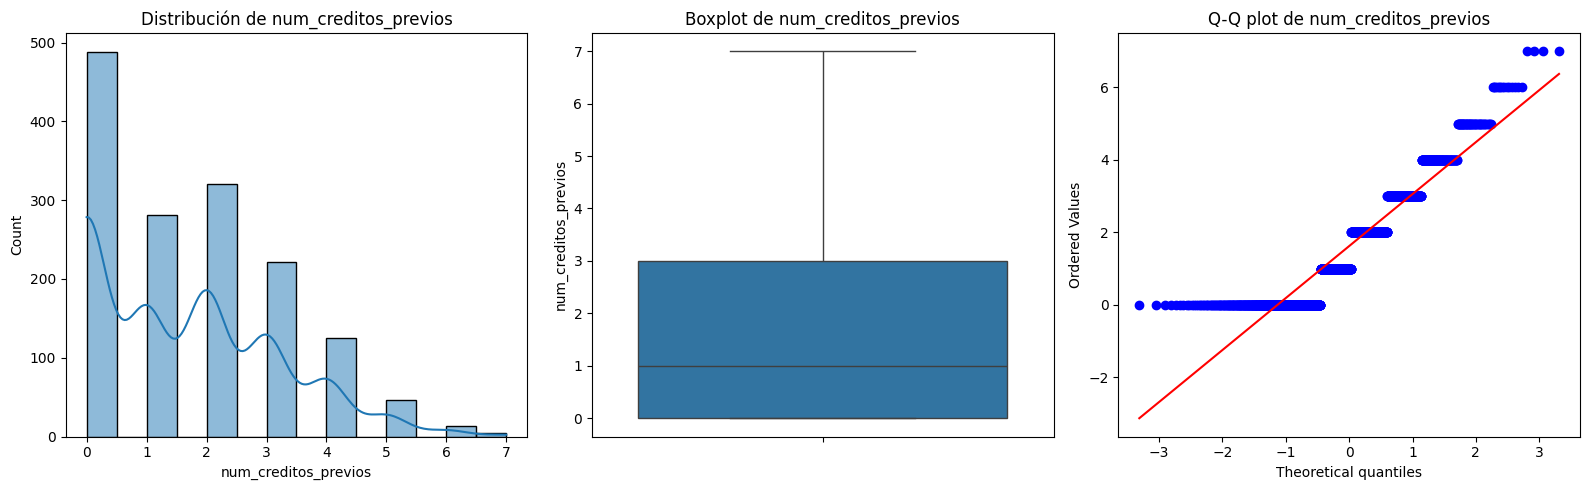


Variable: monto_solicitado
Valores nulos: 0 (0.00%)
Número de outliers (IQR method): 82 (5.47%)


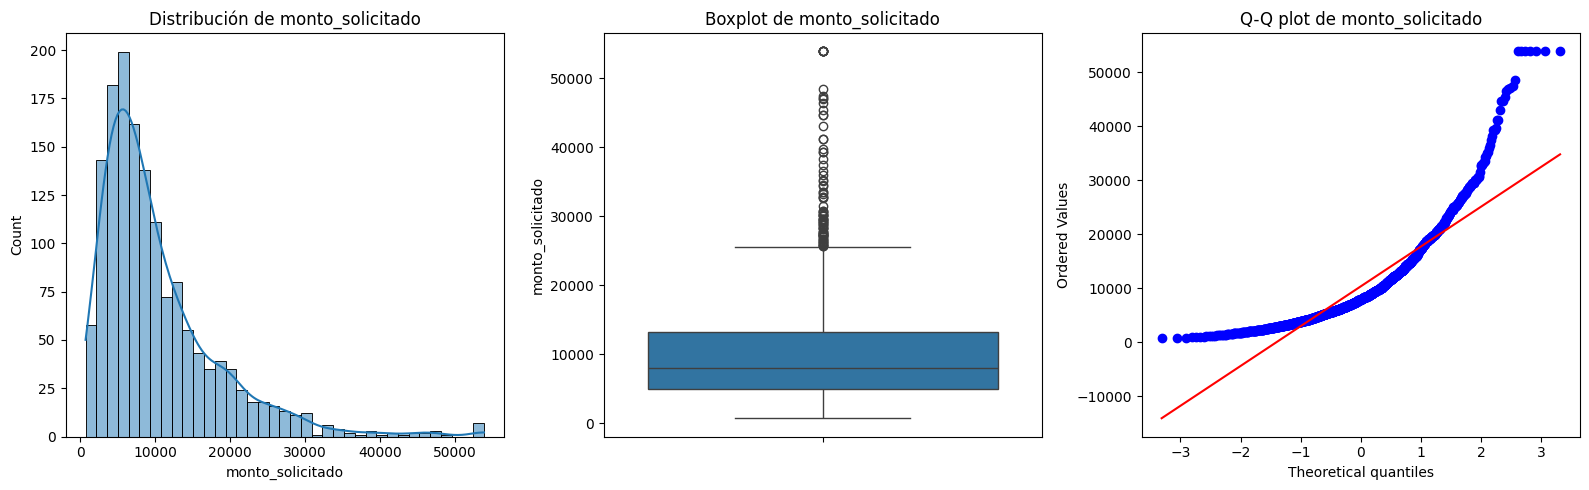


Variable: puntaje_crediticio
Valores nulos: 116 (7.73%)
Número de outliers (IQR method): 6 (0.40%)


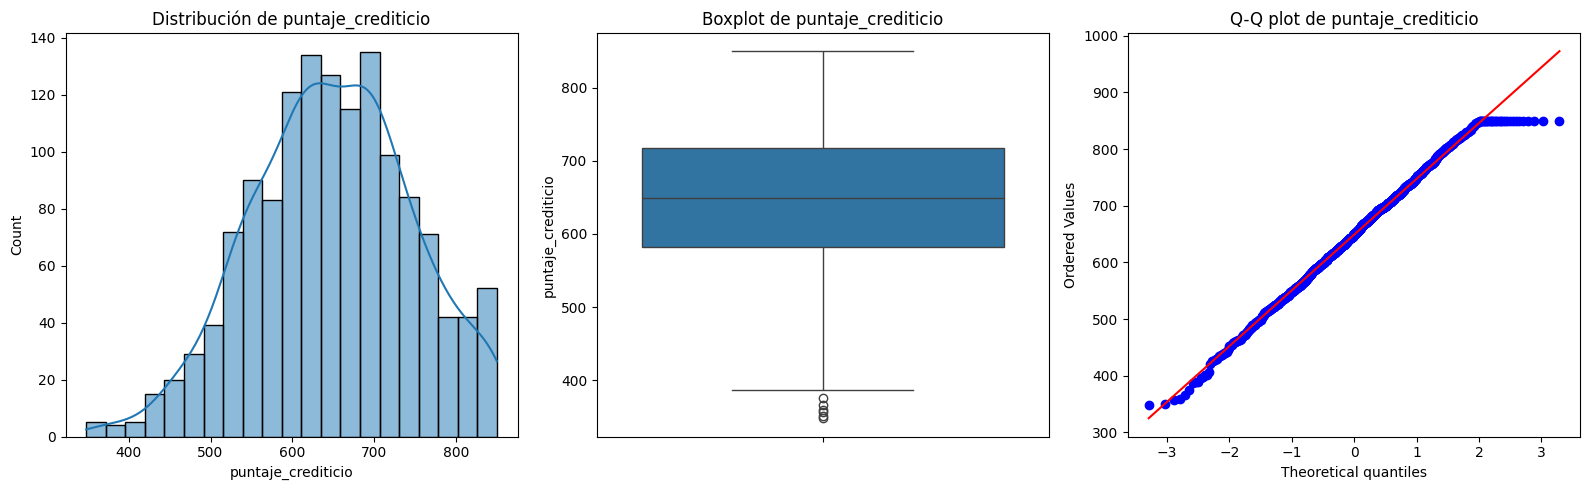

In [ ]:
# Análisis por variable numérica
for col in num_cols:
    print(f"\nVariable: {col}")

    # Análisis de nulos
    null_count = df[col].isnull().sum()
    print(f"Valores nulos: {null_count} ({null_count/len(df)*100:.2f}%)")

    # Análisis de outliers
    if null_count < len(df):  # Solo si hay datos no nulos
        outliers = detect_outliers(df, col)
        print(f"Número de outliers (IQR method): {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

        # Gráficos de distribución
        plt.figure(figsize=(16, 5))

        # Histograma y boxplot
        plt.subplot(1, 3, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribución de {col}')

        plt.subplot(1, 3, 2)
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot de {col}')

        # Gráfico Q-Q
        plt.subplot(1, 3, 3)
        stats.probplot(df[col].dropna(), plot=plt)
        plt.title(f'Q-Q plot de {col}')

        plt.tight_layout()
        plt.show()
    else:
        print("Todos los valores son nulos, no se puede analizar distribución")

## Análisis de variables temporales


Variable: fecha_solicitud
Rango: De 2023-07-02 07:27:55.628952 a 2025-07-01 07:27:55.628952
Días cubiertos: 730 días


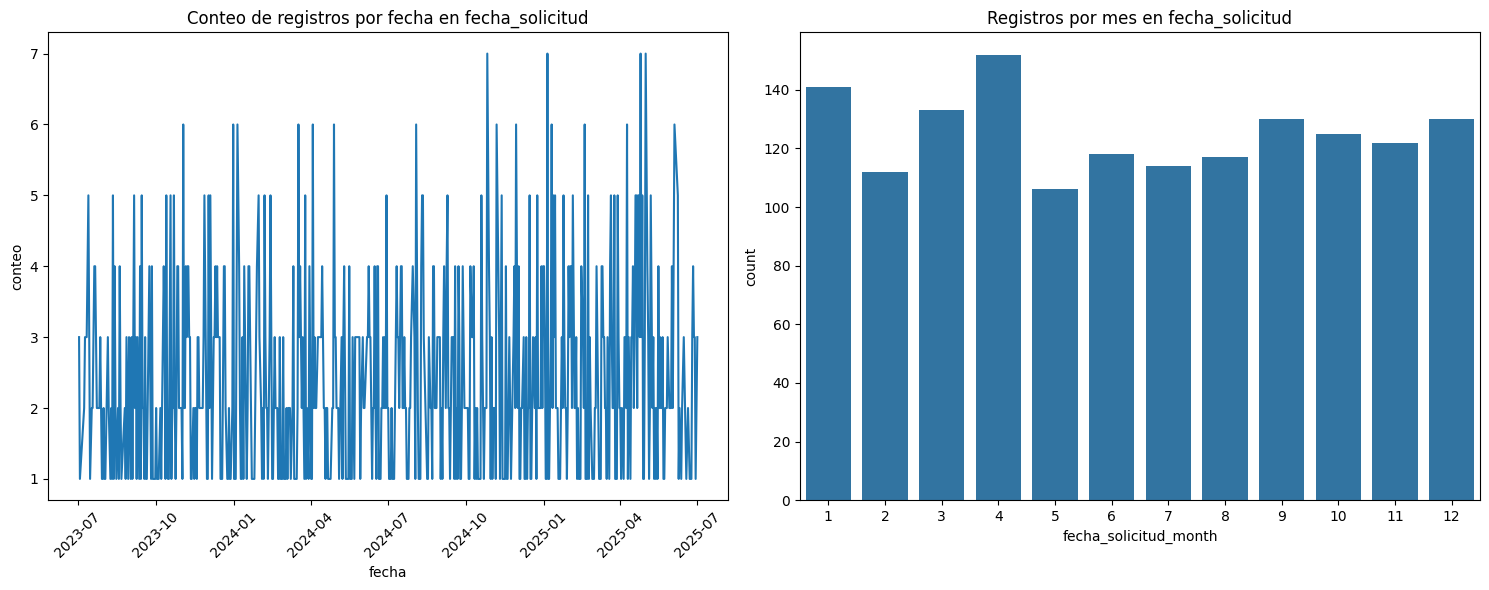

In [ ]:
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

if date_cols:
    for col in date_cols:
        print(f"\nVariable: {col}")

        # Rango de fechas
        print(f"Rango: De {df[col].min()} a {df[col].max()}")
        print(f"Días cubiertos: {(df[col].max() - df[col].min()).days} días")

        # Extraer componentes de fecha
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_weekday'] = df[col].dt.weekday

        # Gráficos de series temporales
        plt.figure(figsize=(15, 6))

        # Conteo por fecha
        temp_df = df[col].value_counts().sort_index().reset_index()
        temp_df.columns = ['fecha', 'conteo']

        plt.subplot(1, 2, 1)
        sns.lineplot(data=temp_df, x='fecha', y='conteo')
        plt.title(f'Conteo de registros por fecha en {col}')
        plt.xticks(rotation=45)

        # Conteo por mes
        plt.subplot(1, 2, 2)
        sns.countplot(data=df, x=f'{col}_month')
        plt.title(f'Registros por mes en {col}')

        plt.tight_layout()
        plt.show()

## Análisis de correlación

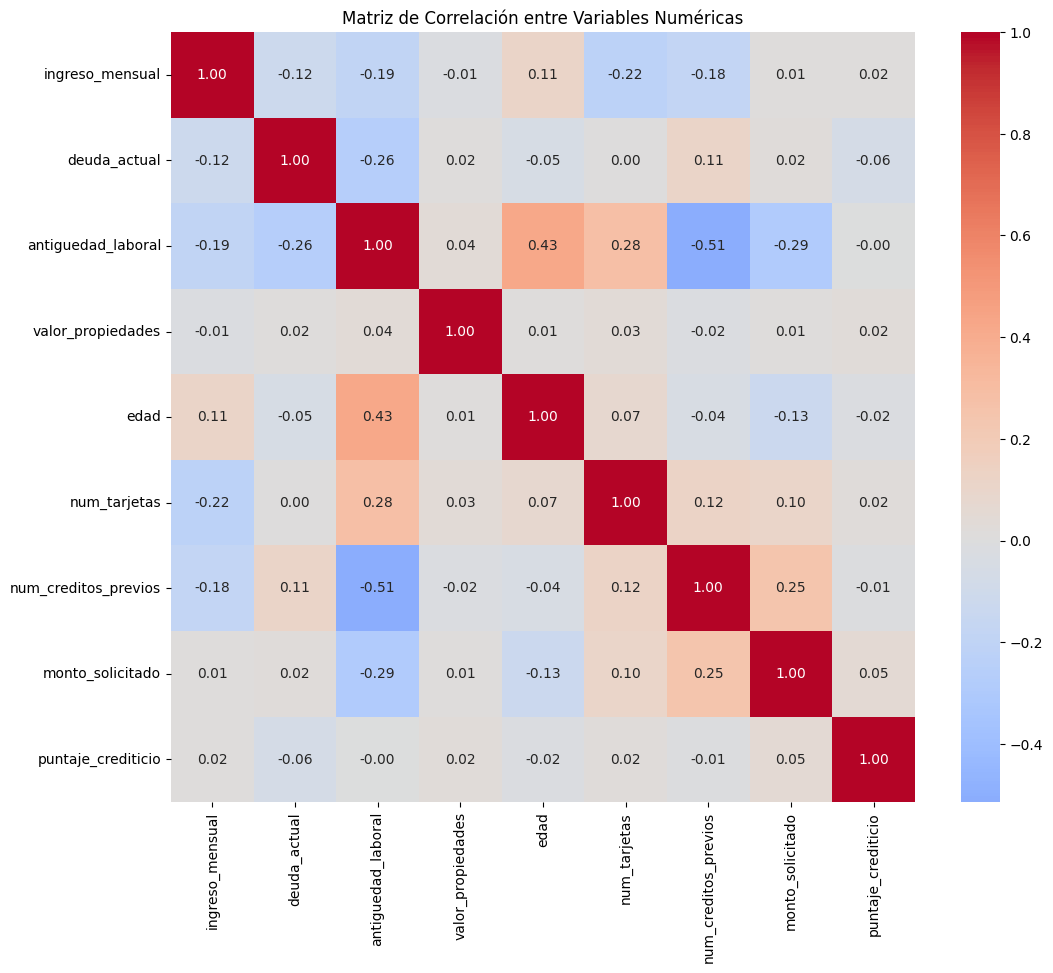

In [ ]:
# Seleccionar solo columnas numéricas para correlación
corr_cols = [col for col in num_cols if df[col].isnull().sum() < len(df)*0.5]  # Excluir columnas con muchos nulos

if len(corr_cols) > 1:
    # Calcular matriz de correlación
    corr_matrix = df[corr_cols].corr(numeric_only=True)

    # Gráfico de matriz de correlación
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title('Matriz de Correlación entre Variables Numéricas')
    plt.show()
else:
    print("No hay suficientes variables numéricas para calcular correlaciones")

## Análisis de la variable objetivo

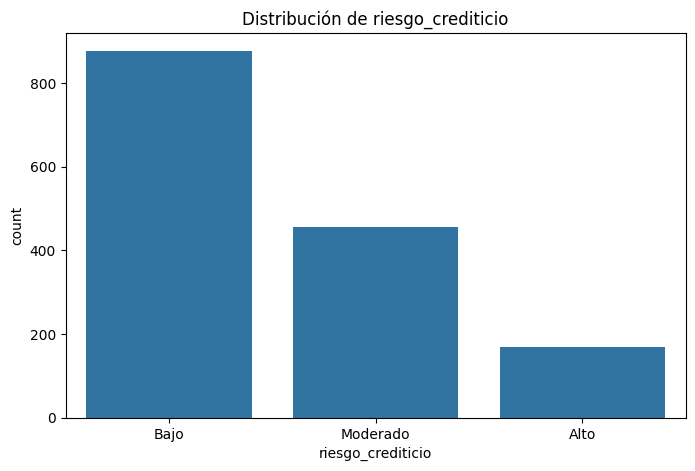


Relación con variables numéricas:


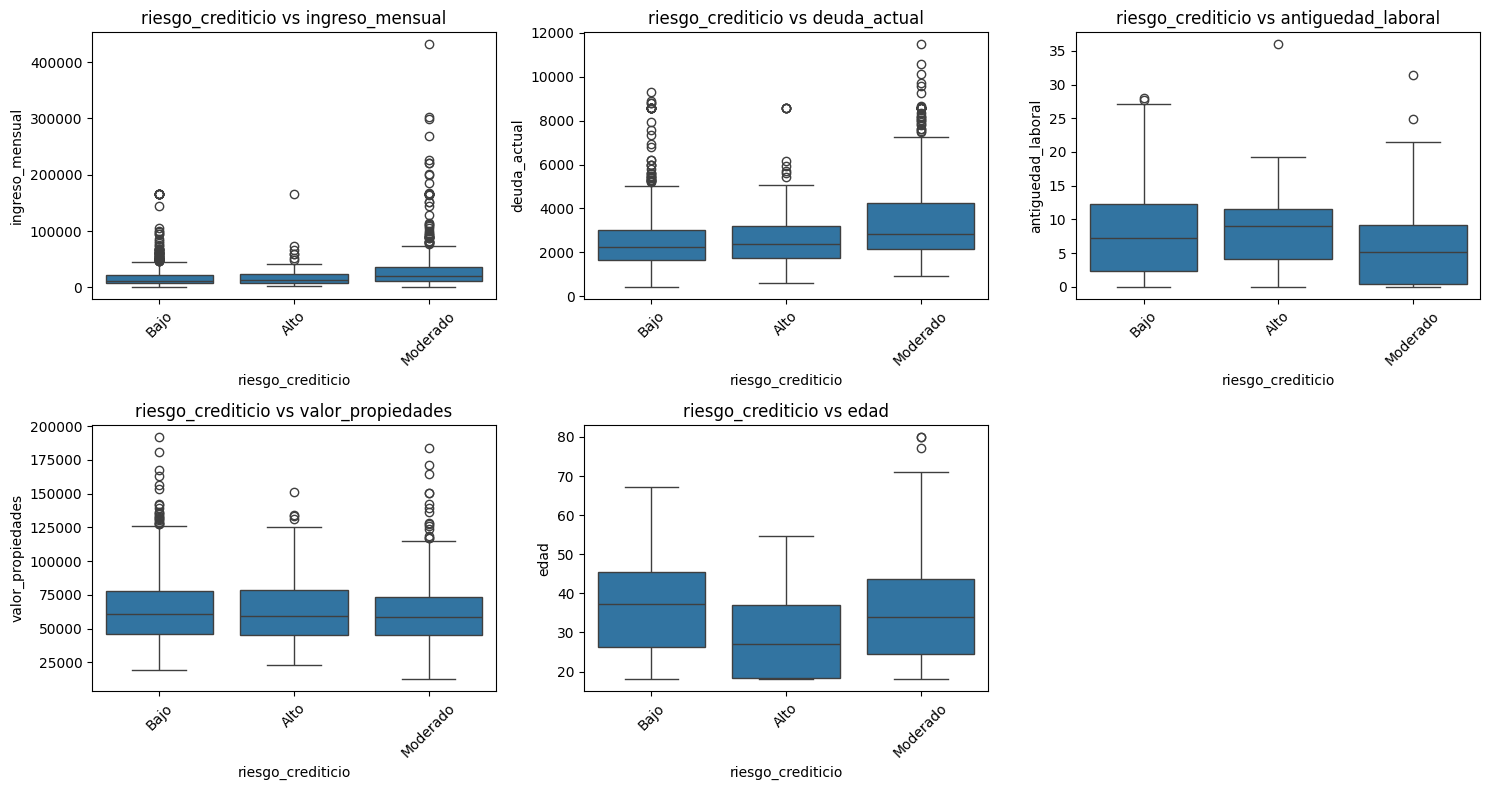


Relación con variables categóricas:


<Figure size 1500x500 with 0 Axes>

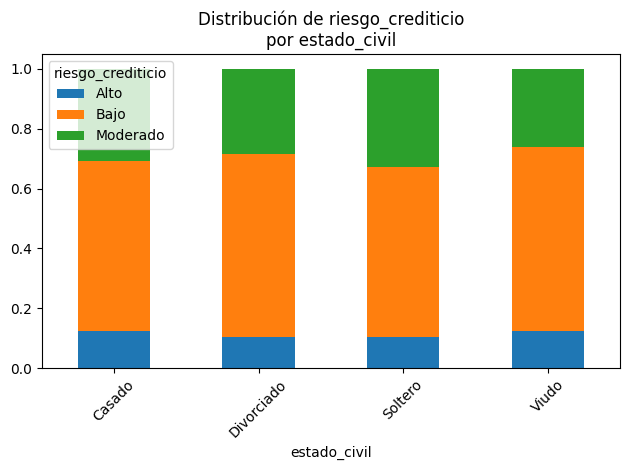

In [ ]:
target_col = 'riesgo_crediticio'

if target_col:

    target_dist = df[target_col].value_counts(normalize=True).mul(100).round(2)

    # Distribución
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=target_col, order=target_dist.index)
    plt.title(f'Distribución de {target_col}')
    plt.show()

    # Relación con variables numéricas
    if num_cols:
        print("\nRelación con variables numéricas:")
        num_cols_to_plot = [col for col in num_cols if col != target_col][:5]  # Limitar a 5 variables

        plt.figure(figsize=(15, 8))
        for i, col in enumerate(num_cols_to_plot, 1):
            plt.subplot(2, 3, i)
            sns.boxplot(data=df, x=target_col, y=col)
            plt.title(f'{target_col} vs {col}')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Relación con variables categóricas
    if cat_cols and len(cat_cols) > 1:  # Excluyendo la propia target si es categórica
        cat_cols_to_plot = [col for col in cat_cols if col != target_col][:3]  # Limitar a 3 variables

        if cat_cols_to_plot:
            print("\nRelación con variables categóricas:")
            plt.figure(figsize=(15, 5))
            for i, col in enumerate(cat_cols_to_plot, 1):
                pd.crosstab(df[col], df[target_col], normalize='index').plot.bar(stacked=True)
                plt.title(f'Distribución de {target_col}\npor {col}')
                plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Creación del modelo

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, KBinsDiscretizer, StandardScaler
from sklearn.impute import SimpleImputer

## Ingeniería de características

In [ ]:
# Columnas para diferentes transformaciones
numeric_features = [
    'ingreso_mensual', 'deuda_actual', 'antiguedad_laboral',
    'valor_propiedades', 'edad', 'num_tarjetas',
    'num_creditos_previos', 'monto_solicitado'
]
categorical_features = ['estado_civil']
date_features = ['fecha_solicitud']
discretize_features = ['puntaje_crediticio']
useless_features = ['id_solicitud']

In [ ]:
def extract_date_features(df):
    df = df.copy()
    df['fecha_solicitud'] = pd.to_datetime(df['fecha_solicitud'])
    df['año_solicitud'] = df['fecha_solicitud'].dt.year
    df['mes_solicitud'] = df['fecha_solicitud'].dt.month
    df['dia_solicitud'] = df['fecha_solicitud'].dt.day
    df['dia_semana_solicitud'] = df['fecha_solicitud'].dt.dayofweek
    df['fin_semana_solicitud'] = df['fecha_solicitud'].dt.dayofweek >= 5
    return df.drop('fecha_solicitud', axis=1)

In [ ]:
# Cada tupla en la lista de transformers se compone de tres partes
# (nombre, transformer, columnas a la que aplicará el transformer)

# Preprocesador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),

        ('date', Pipeline(steps=[
            ('extractor', FunctionTransformer(extract_date_features)),
            ('imputer', SimpleImputer(strategy='most_frequent'))
        ]), date_features),

        ('disc', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('discretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'))
        ]), discretize_features),

        ('drop', 'drop', useless_features)
    ],
    remainder='passthrough'
)

## Modelos a utilizar

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
models = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5],
            'classifier__class_weight': ['balanced', None]
        }
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__max_depth': [3, 5],
            'classifier__subsample': [0.8, 1.0]
        }
    },
    {
        'name': 'SVM',
        'model': SVC(random_state=42, probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__class_weight': ['balanced', None]
        }
    }
]

## Entrenar y evaluar modelos

In [ ]:
X = df.drop('riesgo_crediticio', axis=1)
y = df['riesgo_crediticio']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
best_model = None
best_score = 0
results = []

for model_info in models:
    print(f"\nEntrenando {model_info['name']}...")

    # Crear pipeline completo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])  # El modelo a entrenar
    ])

    # Configurar GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid=model_info['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Entrenar
    grid_search.fit(X_train, y_train)

    # Evaluar
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Exactitud: {accuracy:.4f}")
    print("Reporte de clasificación:")
    print(report)

    # Guardar resultados
    results.append({
        'model': model_info['name'],
        'best_score': grid_search.best_score_,
        'test_accuracy': accuracy,
        'best_params': grid_search.best_params_,
        'grid_search': grid_search
    })

    # Actualizar mejor modelo
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search

## Mejor modelo

In [ ]:
best_result = [r for r in results if r['best_score'] == best_score][0]
print(f"Modelo: {best_result['model']}")
print(f"Exactitud en validación cruzada: {best_score:.4f}")
print(f"Exactitud en test: {best_result['test_accuracy']:.4f}")
print("Mejores parámetros:")
print(best_result['best_params'])

In [ ]:
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best, labels=['Bajo', 'Moderado', 'Alto'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Moderado', 'Alto'],
            yticklabels=['Bajo', 'Moderado', 'Alto'])
plt.title('Matriz de Confusión - Riesgo Crediticio')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
# Guardar el mejor modelo

# También se puede usar esta librería
# import pickle

import joblib

In [ ]:
# Define el nombre del archivo para guardar el modelo
model_filename = 'best_credit_risk_model.pkl'

# Guarda el mejor modelo (que es el objeto GridSearchCV entrenado)
joblib.dump(best_model, model_filename)

print(f"El mejor modelo ha sido guardado como '{model_filename}'")

In [ ]:
# Cargar el modelo para hacer predicciones

loaded_model = joblib.load(model_filename)
df = pd.read_csv("https://drive.google.com/uc?export=download&id=11bDsmghhB4vJYZUQq7sI_9iYX33d2r0v")

sample_df = df.sample(3) # Se obtienen tres filas de forma aleatoria
sample_df.drop(columns="riesgo_crediticio", inplace=True) # Eliminar la columna objetivo, pues la voy a predecir con el modelo

y_pred = loaded_model.predict(sample_df)

In [ ]:
# Ejemplo

x = 5.36
joblib.dump(x, "valor_x.pkl")

['valor_x.pkl']

In [ ]:
x_from_file = joblib.load("valor_x.pkl")

In [ ]:
x_from_file

5.36